In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import joblib
from sklearn import preprocessing
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
training_df = pd.read_csv("Urban land cover/training.csv")
test_df = pd.read_csv("Urban land cover/testing.csv")

In [39]:
training_df

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,car,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,...,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69
164,soil,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,...,18.91,3.49,0.88,0.67,7.88,1.44,0.82,0.06,990,824.01
165,grass,2.97,252,1.73,164.13,3.20,3.09,184.15,152.03,156.22,...,33.52,2.02,0.86,0.71,8.50,1.82,0.54,0.06,948,821.84
166,grass,1.57,216,1.27,164.84,1.71,1.97,192.55,148.34,153.62,...,24.49,1.13,0.76,0.85,7.75,2.11,0.30,0.09,254,1580.72


In [40]:
training_df.dtypes

class             object
BrdIndx          float64
Area               int64
Round            float64
Bright           float64
                  ...   
Dens_140         float64
Assym_140        float64
NDVI_140         float64
BordLngth_140      int64
GLCM3_140        float64
Length: 148, dtype: object

In [41]:
training_df.isnull().any()

class            False
BrdIndx          False
Area             False
Round            False
Bright           False
                 ...  
Dens_140         False
Assym_140        False
NDVI_140         False
BordLngth_140    False
GLCM3_140        False
Length: 148, dtype: bool

In [42]:
test_df

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,building,1.36,3146,0.90,244.97,1.44,1.39,229.86,252.47,252.58,...,7.58,1.51,0.63,0.84,6.85,1.96,0.47,-0.04,784,1911.96
503,grass,2.51,428,1.55,166.02,2.16,2.61,210.11,135.89,152.04,...,18.91,1.14,0.86,0.67,7.70,1.80,0.50,0.22,1020,801.65
504,concrete,2.45,659,1.38,219.30,1.68,2.53,189.64,233.14,235.12,...,14.67,2.21,0.74,0.78,7.47,1.70,0.74,-0.09,2596,1243.03
505,building,1.90,89,1.01,219.88,2.02,2.01,184.82,235.18,239.65,...,37.11,5.26,0.75,0.85,8.47,1.30,0.94,-0.12,726,1470.63


<AxesSubplot:>

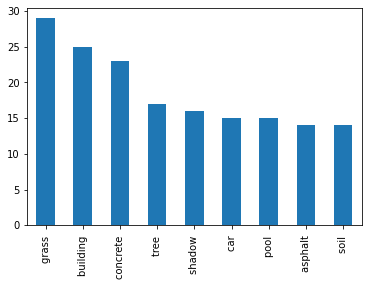

In [43]:
training_df['class'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

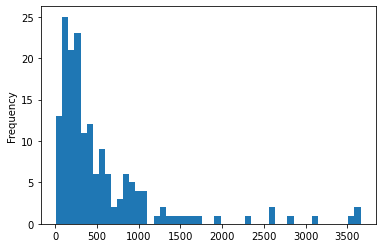

In [44]:
training_df['Area'].plot(kind = 'hist', bins=50)

[]

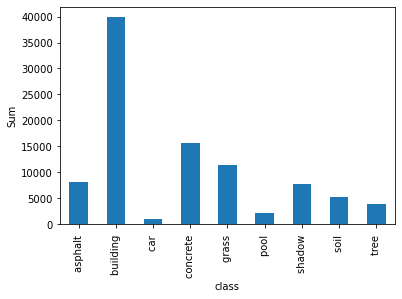

In [45]:
area_df = training_df.groupby('class').sum()['Area']
ax = area_df.plot.bar(x='class')
ax.set_ylabel('Sum')
ax.plot()

In [46]:
trainData = training_df.loc[:, training_df.columns != 'class']
trainData = preprocessing.scale(trainData)
testData = test_df.loc[:, test_df.columns != 'class']
testData = preprocessing.scale(testData)
trainLabel = training_df.loc[:,training_df.columns[0]]
trainLabel = training_df['class']
testLabel = test_df['class']

<AxesSubplot:>

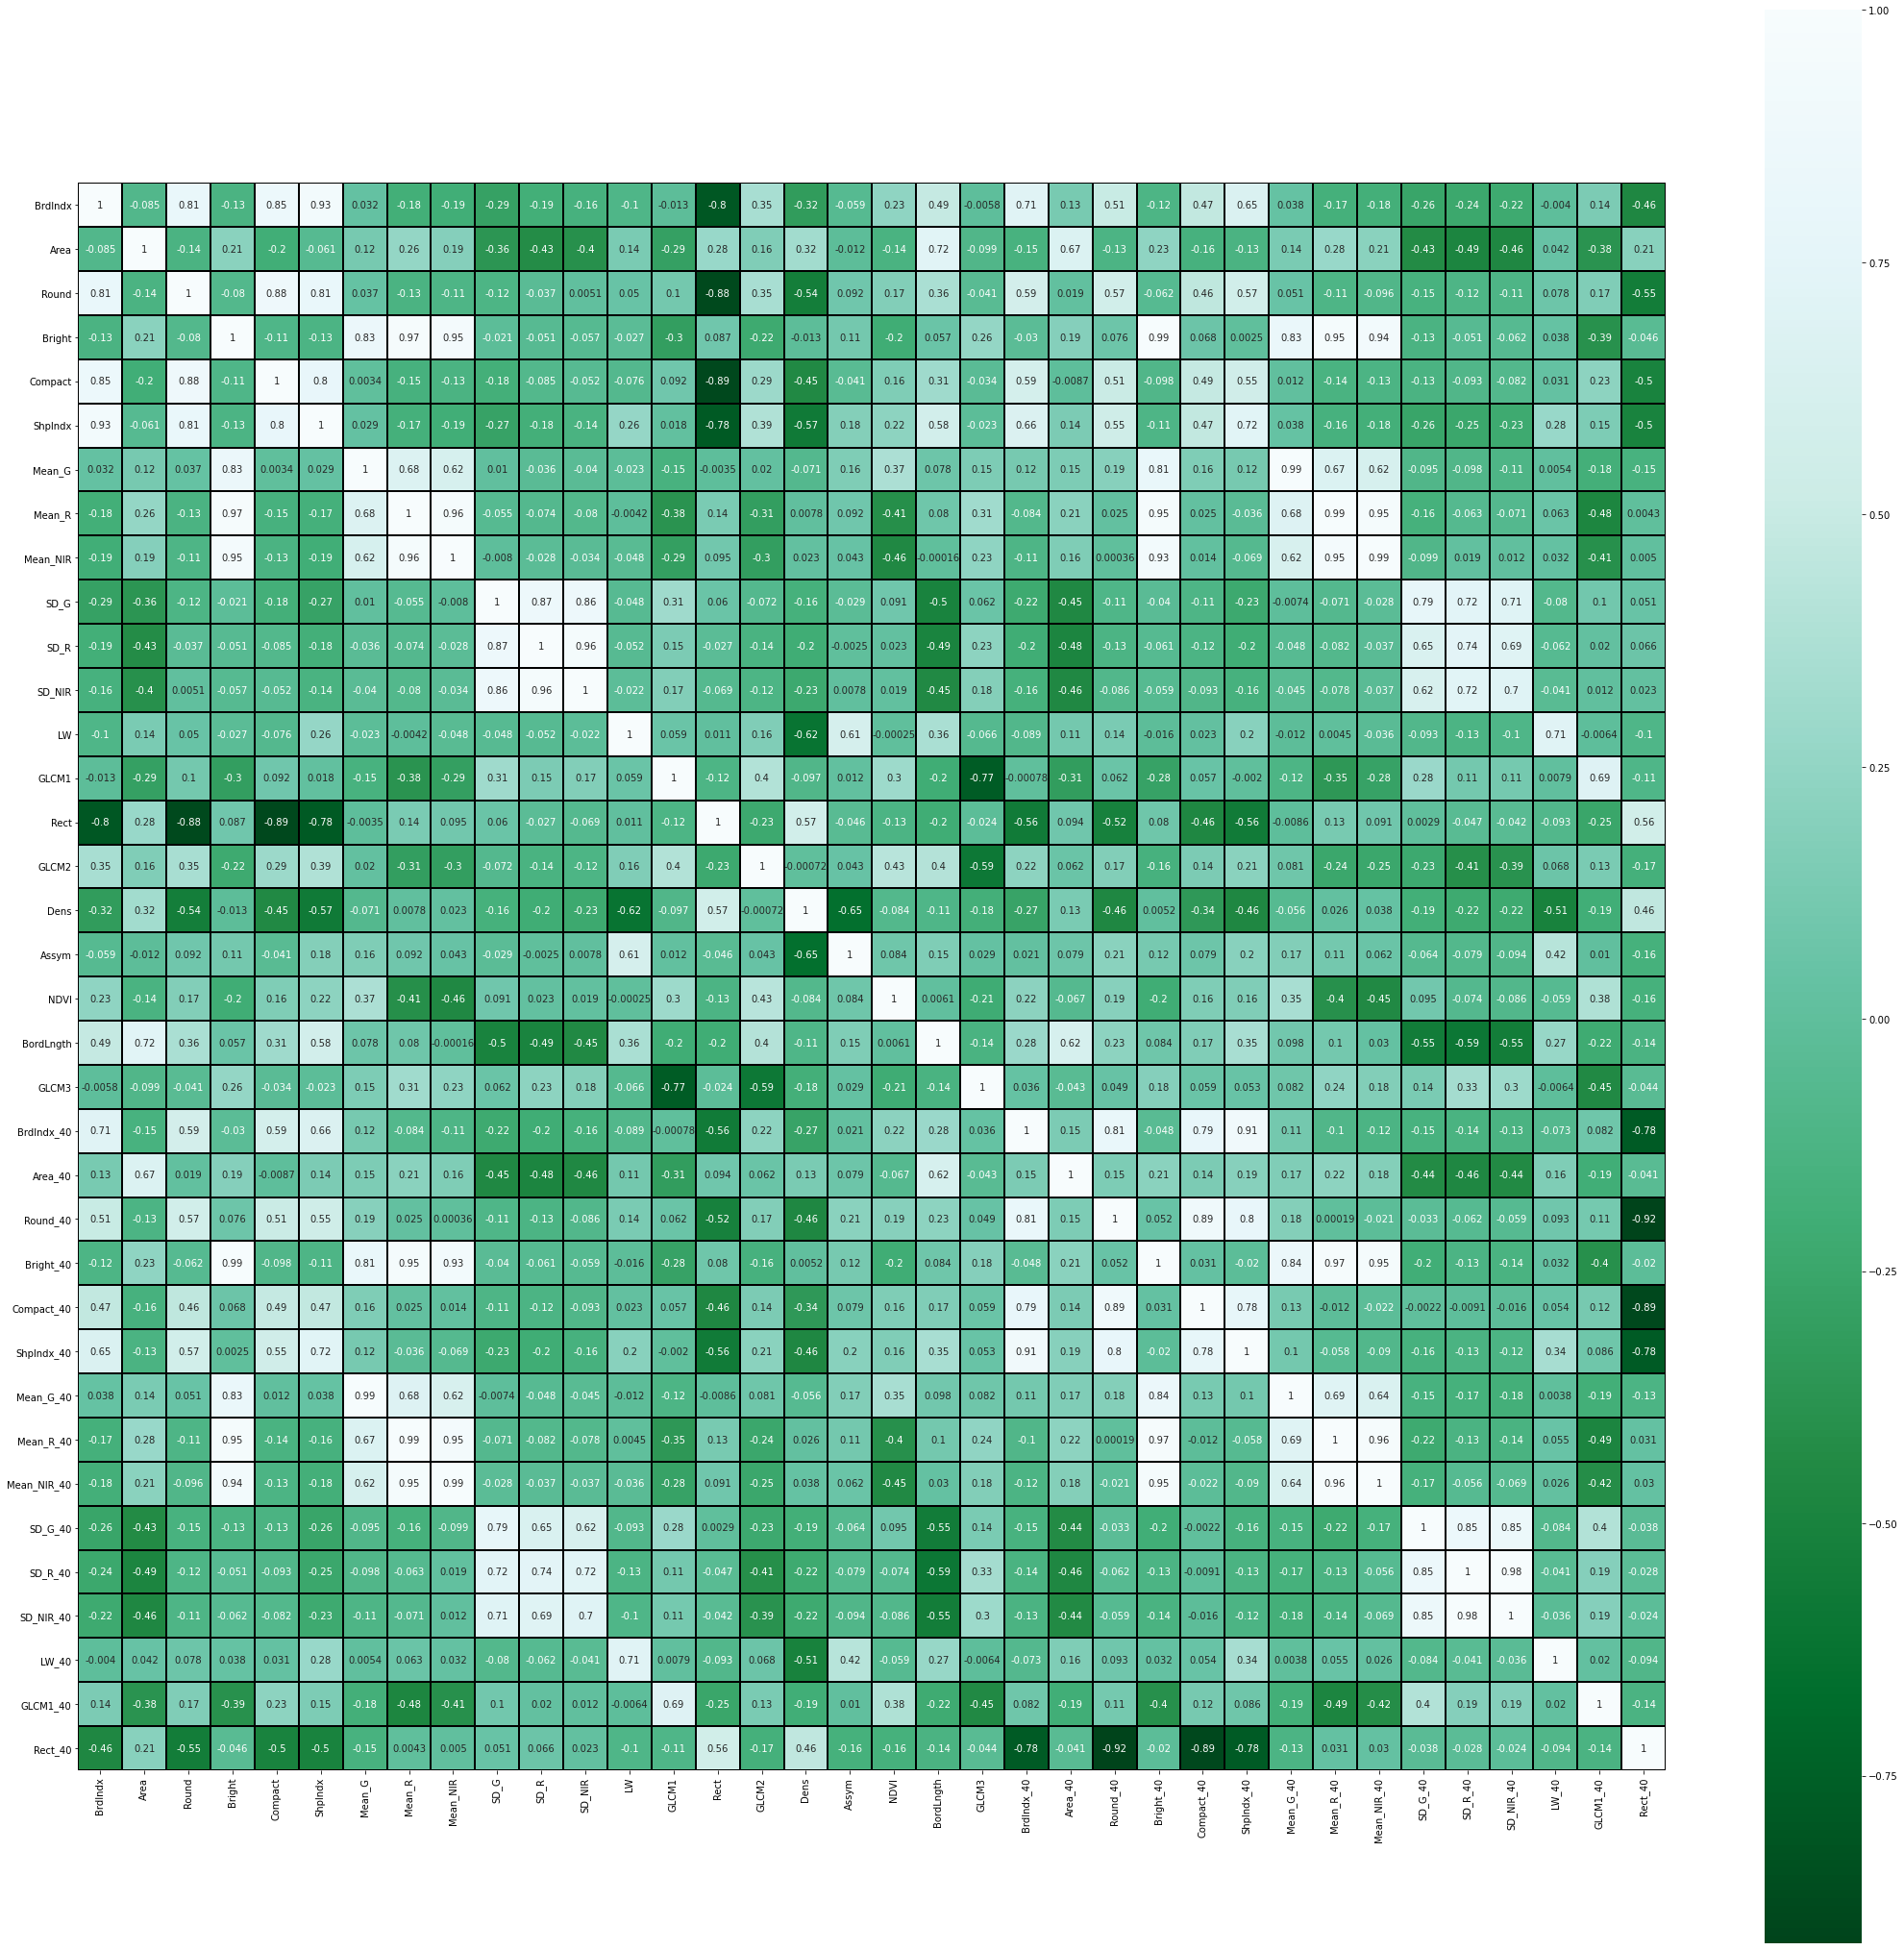

In [47]:
data=training_df.iloc[:,:37] 
cols=training_df.columns 
data_corr = data.corr()
plt.figure(figsize=(37,37))

sns.heatmap(data_corr, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

# Method 1

In [48]:
train_x, test_x, train_y, test_y = train_test_split(trainData, trainLabel, test_size=0.30, random_state=42)

In [49]:
rft_train = RandomForestClassifier()
rft_train.fit(train_x, train_y)
prediction_train = rft_train.predict(test_x)
#Accuracy
accuracy_score(test_y, prediction_train)

0.9019607843137255

In [50]:
rft = RandomForestClassifier()
rft.fit(trainData, trainLabel)

RandomForestClassifier()

In [51]:
clf = SVC(C = 1e5, kernel = 'linear')
clf.fit(trainData, trainLabel) 

SVC(C=100000.0, kernel='linear')

In [52]:
models = []
models.append(('Random Forest classifier', rft))
models.append(('SVM', clf))
results = []
names = []
scoring = "accuracy"

In [53]:
prediction_train_full = rft.predict(testData)

In [54]:
accuracy_score(testLabel, prediction_train_full)

0.8106508875739645

In [55]:
precision_full = precision_score(testLabel, prediction_train_full, average="weighted")
recall_full = recall_score(testLabel, prediction_train_full, average="weighted")

print ("Precision:", precision_full) 
print ("Recall:", recall_full) 

Precision: 0.818275494698415
Recall: 0.8106508875739645


In [56]:
prediction_svm = clf.predict(testData)

In [57]:
accuracy_score(testLabel, prediction_svm)

0.73767258382643

In [58]:
precision_svm = precision_score(testLabel, prediction_svm, average="weighted")
recall_svm = recall_score(testLabel, prediction_svm, average="weighted")

print ("Precision:", precision_svm) 
print ("Recall:", recall_svm) 

Precision: 0.7476092132158199
Recall: 0.73767258382643


Feature ranking:
1. feature 18 (0.042820)
2. feature 39 (0.033781)
3. feature 60 (0.032266)
4. feature 87 (0.025761)
5. feature 28 (0.023628)
6. feature 70 (0.023097)
7. feature 134 (0.022683)
8. feature 81 (0.019098)
9. feature 6 (0.016975)
10. feature 49 (0.016965)
11. feature 123 (0.016884)
12. feature 29 (0.016427)
13. feature 69 (0.016225)
14. feature 66 (0.016212)
15. feature 126 (0.015413)


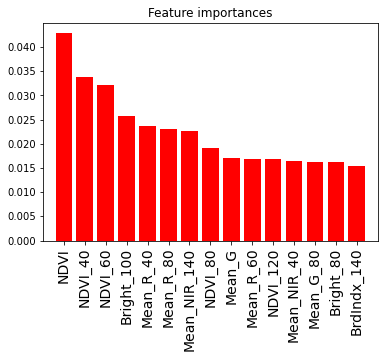

In [59]:
importances = rft.feature_importances_
feat_names = training_df.drop(['class'],axis=1).columns
indices = np.argsort(importances)[::-1]
top_k = 15
new_indices = indices[:top_k]
# Print the feature ranking
print("Feature ranking:")

for f in range(top_k):
    print("%d. feature %d (%f)" % (f + 1 , new_indices[f], importances[new_indices[f]]))
#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_k), importances[new_indices],
       color="r", align="center")
plt.xticks(range(top_k), feat_names[new_indices], rotation='vertical',fontsize=14)
plt.xlim([-1, top_k])
plt.show()

# Method 2

In [60]:
rfc = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)


rfc.fit(trainData, trainLabel)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

In [61]:
from sklearn.feature_selection import SelectFromModel

#We will select the features that will have importance of more than 0.010
sfm = SelectFromModel(rfc, threshold=0.010)

# Train the selector
sfm.fit(trainData, trainLabel)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [62]:
X_important_trainData = sfm.transform(trainData)
X_important_testData = sfm.transform(testData)

In [63]:
X_important_trainData.shape

(168, 35)

In [64]:
df_feat = pd.DataFrame(X_important_trainData, range(168),range(35))

In [65]:
rfc_important = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)


rfc_important.fit(X_important_trainData, trainLabel)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

In [66]:
scores_train = cross_val_score(rfc_important, X_important_trainData, trainLabel, cv=10)
print('Cross validation score:', scores_train.mean())

Cross validation score: 0.8573529411764707


In [67]:
y_important_predict = rfc_important.predict(X_important_testData)


accuracy_score(testLabel, y_important_predict)

0.7692307692307693

In [68]:
print(classification_report(testLabel, y_important_predict))

              precision    recall  f1-score   support

    asphalt        0.84      0.82      0.83        45
   building        0.73      0.82      0.77        97
        car        0.61      0.95      0.74        21
   concrete        0.81      0.67      0.73        93
      grass        0.71      0.81      0.76        83
       pool        0.87      0.93      0.90        14
     shadow        0.86      0.84      0.85        45
       soil        0.58      0.55      0.56        20
       tree        0.87      0.70      0.78        89

    accuracy                           0.77       507
   macro avg       0.76      0.79      0.77       507
weighted avg       0.78      0.77      0.77       507



In [69]:
cm = confusion_matrix(testLabel, y_important_predict)
cm

array([[37,  2,  1,  0,  0,  1,  4,  0,  0],
       [ 2, 80,  4, 11,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  1,  0,  0,  0,  0,  0],
       [ 0, 25,  3, 62,  0,  0,  0,  2,  1],
       [ 0,  1,  2,  0, 67,  0,  0,  6,  7],
       [ 0,  0,  0,  0,  1, 13,  0,  0,  0],
       [ 4,  0,  1,  0,  0,  1, 38,  0,  1],
       [ 0,  2,  2,  3,  2,  0,  0, 11,  0],
       [ 1,  0,  0,  0, 24,  0,  2,  0, 62]], dtype=int64)

In [70]:
y_important_predict = pd.Series(y_important_predict)

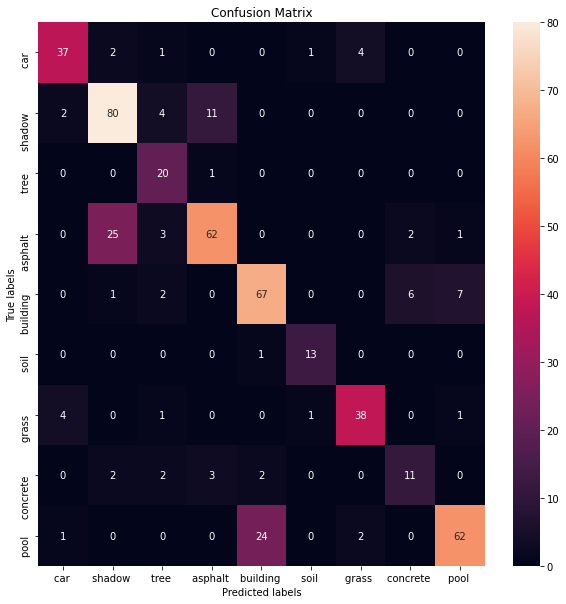

In [71]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cm, annot=True, ax = ax, linecolor = 'k'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_important_predict.unique()); 
ax.yaxis.set_ticklabels(y_important_predict.unique());

In [72]:
X, y = X_important_trainData, trainLabel

# building a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: Accuracy : {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# using a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# running grid search
grid_search = GridSearchCV(clf, param_grid=param_grid,cv=5)
start = time()
grid_search.fit(X, y)
grid_search.predict(X_important_testData)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 12.60 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: Accuracy : 0.875 (std: 0.044)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: Accuracy : 0.875 (std: 0.074)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: Accuracy : 0.869 (std: 0.055)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 2}



In [73]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019469,0.005998,0.000000,0.000000,True,gini,3,1,2,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.882353,0.794118,0.735294,0.696970,0.757576,0.773262,0.062998,58
1,0.018846,0.006425,0.003124,0.006249,True,gini,3,1,3,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.823529,0.794118,0.764706,0.727273,0.666667,0.755258,0.054575,69
2,0.018820,0.004493,0.003124,0.006249,True,gini,3,1,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.852941,0.735294,0.764706,0.666667,0.787879,0.761497,0.061234,65
3,0.023568,0.007831,0.003132,0.006263,True,gini,3,3,2,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.823529,0.705882,0.823529,0.727273,0.848485,0.785740,0.057600,51
4,0.017928,0.009161,0.003931,0.005934,True,gini,3,3,3,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.823529,0.764706,0.823529,0.757576,0.696970,0.773262,0.047315,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.033841,0.005148,0.003183,0.000404,False,entropy,None,3,3,"{'bootstrap': False, 'criterion': 'entropy', '...",0.970588,0.852941,0.705882,0.727273,0.909091,0.833155,0.102426,16
68,0.030502,0.004062,0.003603,0.001362,False,entropy,None,3,10,"{'bootstrap': False, 'criterion': 'entropy', '...",0.970588,0.764706,0.764706,0.757576,0.878788,0.827273,0.084711,22
69,0.042898,0.004882,0.002193,0.001162,False,entropy,None,10,2,"{'bootstrap': False, 'criterion': 'entropy', '...",0.911765,0.735294,0.764706,0.727273,0.878788,0.803565,0.076625,38
70,0.043798,0.007569,0.001789,0.000976,False,entropy,None,10,3,"{'bootstrap': False, 'criterion': 'entropy', '...",0.941176,0.823529,0.764706,0.757576,0.848485,0.827094,0.066649,23
